In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import keras

batch_size = 32
train_ds, val_ds = keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Dataset/hand',
    image_size=(224, 224),
    batch_size=batch_size,
    validation_split=0.3,
    subset='both',
    seed=3407
)

Found 4000 files belonging to 4 classes.
Using 2800 files for training.
Using 1200 files for validation.


In [3]:
from keras import Model
from keras.applications.vgg16 import VGG16

from typing import cast

num_classes = 4

base_model = VGG16(include_top=False, weights=None, pooling='avg', input_shape=(224, 224, 3)) # type: ignore
base_model = cast(Model, base_model)

outputs = base_model.layers[-2].output
outputs = keras.layers.Flatten(name='flatten')(outputs)
outputs = keras.layers.Dense(512, name='fc1', activation='relu')(outputs)
outputs = keras.layers.Dense(256, name='fc2', activation='relu')(outputs)
outputs = keras.layers.Dense(num_classes, name='softmax', activation='softmax')(outputs)

model = Model(inputs=base_model.input, outputs=outputs, name=base_model.name)
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 27,692,612 (105.64 MB)

 Trainable params: 27,692,612 (105.64 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Cài đặt callback để lưu mô hình tốt nhất
checkpoint = ModelCheckpoint('best.keras',  # Lưu mô hình tốt nhất
                             monitor='val_accuracy',
                             save_best_only=True,
                             mode='max',
                             verbose=1)

# Compile mô hình
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Huấn luyện mô hình
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=20,
                    callbacks=[checkpoint])

# Đánh giá trên tập huấn luyện
loss, accuracy = model.evaluate(train_ds)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

# Lưu mô hình cuối cùng
model.save('last.keras')


Epoch 1/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.2606 - loss: 34.6132
Epoch 1: val_accuracy improved from -inf to 0.70250, saving model to best.keras
88/88 ━━━━━━━━━━━━━━━━━━━━ 1200s 13s/step - accuracy: 0.2617 - loss: 34.3312 - val_accuracy: 0.7025 - val_loss: 0.8495
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 0.6824 - loss: 0.8304
Epoch 2: val_accuracy improved from 0.70250 to 0.79917, saving model to best.keras
88/88 ━━━━━━━━━━━━━━━━━━━━ 52s 578ms/step - accuracy: 0.6828 - loss: 0.8308 - val_accuracy: 0.7992 - val_loss: 0.5742
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.8208 - loss: 0.5020
Epoch 3: val_accuracy improved from 0.79917 to 0.87167, saving model to best.keras
88/88 ━━━━━━━━━━━━━━━━━━━━ 50s 569ms/step - accuracy: 0.8211 - loss: 0.5012 - val_accuracy: 0.8717 - val_loss: 0.3860
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - accuracy: 0.8811 - loss: 0.3497
Epoch 4: val_accuracy improved from 0.87167 to 0.90333, s

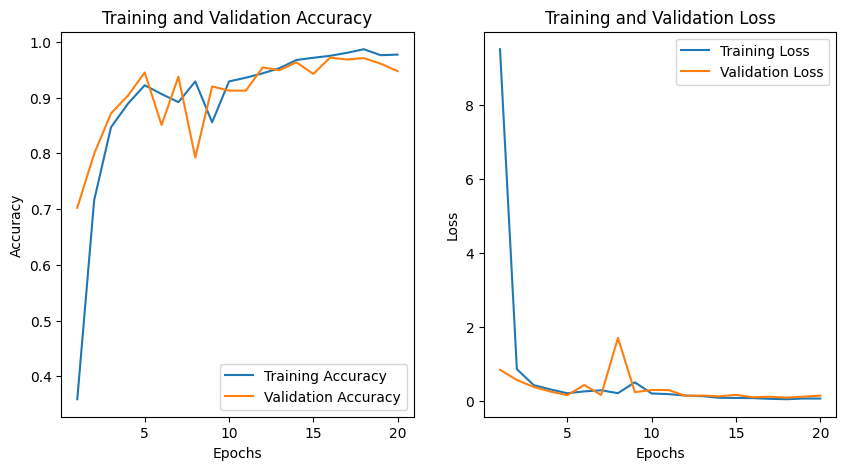

In [5]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss,label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('vgg16.svg')
plt.show()

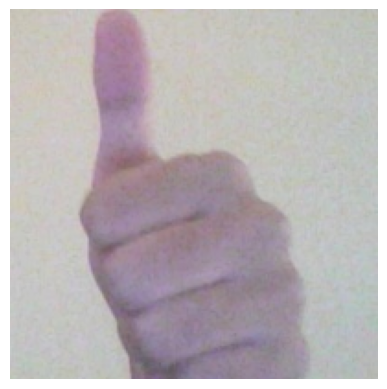

1743159851.53953
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1743159854.1503935
Class 0: 0.2578
Class 1: 0.1615
Class 2: 0.3310
Class 3: 0.2497
Predicted class: 2
Inference time: 2.6109 ms


In [6]:
from tensorflow.keras.preprocessing import image
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import load_model

# Tải mô hình tốt nhất
model = load_model('best.keras')

img_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/hand/1/0.jpg'
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off')  # Tắt hiển thị trục
plt.show()


# Tải và chuẩn bị ảnh
start_time = time.time()
print(start_time)
img = image.load_img(img_path, target_size=(224, 224))  # Resize ảnh về kích thước 224x224
img_array = image.img_to_array(img)  # Chuyển ảnh sang mảng numpy
img_array = np.expand_dims(img_array, axis=0)  # Thêm chiều batch
img_array = img_array / 255.0  # Chuẩn hóa giá trị pixel
# Thực hiện suy luận
predictions = model.predict(img_array)
end_time = time.time()
print(end_time)
predicted_class = np.argmax(predictions, axis=1)  # Lấy lớp dự đoán

# Kết thúc đo thời gian
inference_time = end_time - start_time

# In kết quả
for i, prob in enumerate(predictions[0]):
    print(f"Class {i}: {prob:.4f}")

print(f"Predicted class: {predicted_class[0]}")
print(f"Inference time: {inference_time:.4f} ms")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 59.0MB/s]


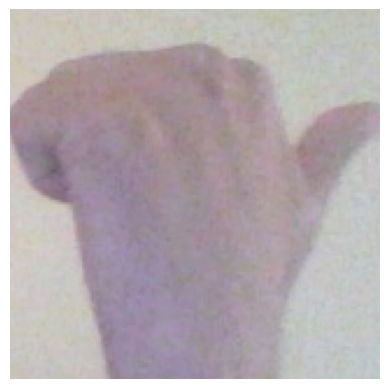

658


<ipython-input-7-cbe3e360b7e5>:54: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  class_idx = F.softmax(outputs).argmax().item()


In [7]:
import numpy as np
import cv2
from torchvision import models, transforms
from torch.nn import functional as F
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

model = models.resnet50(pretrained=True)
model = model.eval()

# define a function to store the feature maps at the final convolutional layer
activation = {}
def getActivation(name):
    # the hook signature
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

model.layer4.register_forward_hook(getActivation('final_conv'))

image_path = "/content/drive/MyDrive/Colab Notebooks/Dataset/hand/3/0.jpg"
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Tắt hiển thị trục
plt.show()

# define the data transformation pipeline: resize => tensor => normalize
transforms = transforms.Compose(
    [transforms.ToPILImage(),
     transforms.Resize((224, 224)),
     transforms.ToTensor(),
     transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
    ]
)

image = cv2.imread(image_path)
orig_image = image.copy()

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
height, width, _ = image.shape


# apply the image transforms
image_tensor = transforms(image)
# add batch dimension
image_tensor = image_tensor.unsqueeze(0)
# forward pass through model
outputs = model(image_tensor)
# get the idx of predicted class
class_idx = F.softmax(outputs).argmax().item()
print(class_idx) # output: 201


# Fetch feature maps at the final convolutional layer
conv_features = activation['final_conv']

# Fetch the learned weights at the final feed-forward layer
weight_fc = model.fc.weight.detach().numpy()



In [8]:
def calculate_cam(feature_conv, weight_fc, class_idx):

    # generate the class activation maps upsample to 224x224
    size_upsample = (224, 224)

    bz, nc, h, w = feature_conv.shape

    cam = weight_fc[class_idx].dot(feature_conv.reshape((nc, h*w)))
    cam = cam.reshape(h, w)
    cam = cam - np.min(cam)
    cam_img = cam / np.max(cam)
    cam_img = np.uint8(255 * cam_img)
    output_cam = cv2.resize(cam_img, size_upsample)

    return output_cam

# generate class activation mapping
class_activation_map = calculate_cam(conv_features, weight_fc, class_idx)


<ipython-input-8-003e515725aa>:8: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  cam = weight_fc[class_idx].dot(feature_conv.reshape((nc, h*w)))


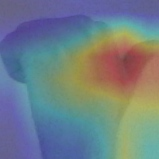

In [9]:
!pip install opencv-python-headless
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # Import cv2_imshow

def visualize_cam(class_activation_map, width, height, orig_image):
    heatmap = cv2.applyColorMap(cv2.resize(class_activation_map,(width, height)), cv2.COLORMAP_JET)
    result = heatmap * 0.3 + orig_image * 0.5

    cv2_imshow(result) # Use cv2_imshow instead of cv2.imshow
    cv2.waitKey(0)

# visualize result
visualize_cam(class_activation_map, width, height, orig_image)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:07<00:00, 72.0MB/s]


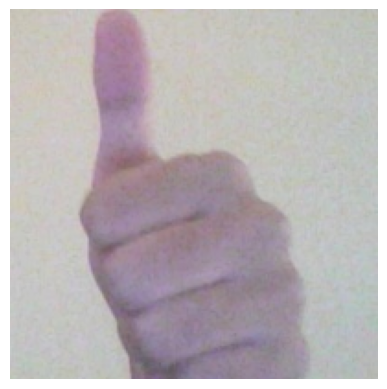

419


<ipython-input-10-a4de27ee31cc>:56: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  class_idx = F.softmax(outputs).argmax().item()


In [10]:
import numpy as np
import cv2
from torchvision import models, transforms
from torch.nn import functional as F
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

model = models.vgg16(weights='IMAGENET1K_V1')
model = model.eval()

# Dictionary to store activation maps
activation = {}

# Define a hook function to store the activation
def getActivation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

# Register hook on the final convolutional layer
# The final convolutional layer of VGG16 is at index -1 in `features`
layer_name = 'final_conv'
model.features[-1].register_forward_hook(getActivation(layer_name))

image_path = "/content/drive/MyDrive/Colab Notebooks/Dataset/hand/1/0.jpg"
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Tắt hiển thị trục
plt.show()
# define the data transformation pipeline: resize => tensor => normalize
transforms = transforms.Compose(
    [transforms.ToPILImage(),
     transforms.Resize((224, 224)),
     transforms.ToTensor(),
     transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
    ]
)

image = cv2.imread(image_path)
orig_image = image.copy()

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
height, width, _ = image.shape

# apply the image transforms
image_tensor = transforms(image)
# add batch dimension
image_tensor = image_tensor.unsqueeze(0)
# forward pass through model
outputs = model(image_tensor)
# get the idx of predicted class
class_idx = F.softmax(outputs).argmax().item()
print(class_idx) # output: 201

# Fetch feature maps at the final convolutional layer
conv_features = activation['final_conv']

# Fetch the learned weights at the final feed-forward layer
weight_fc = model.classifier[-1].weight.detach().numpy()


In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_cam(feature_conv, weight_fc, class_idx):
    """
    Calculate Class Activation Map (CAM) for a given class index.

    Args:
        feature_conv (numpy.ndarray): Feature maps from the final convolutional layer.
        weight_fc (numpy.ndarray): Weights of the final feed-forward layer.
        class_idx (int): Target class index.

    Returns:
        numpy.ndarray: Resized CAM image (224x224).
    """
    # Resize convolutional features for CAM calculation
    bz, nc, h, w = feature_conv.shape
    feature_conv = feature_conv[0]  # Remove batch dimension

    # Ensure feature_conv is reshaped to match weight dimensions
    feature_conv_reshaped = feature_conv.reshape((nc, h * w))  # Shape: [channels, height * width]

    # Compute the class activation map
    cam = weight_fc[class_idx].dot(feature_conv_reshaped)  # Shape: [height * width]
    cam = cam.reshape(h, w)  # Reshape back to spatial dimensions (height, width)

    # Normalize CAM
    cam = cam - np.min(cam)  # Normalize to range [0, 1]
    cam_img = cam / np.max(cam)
    cam_img = np.uint8(255 * cam_img)

    # Resize to original input image size
    size_upsample = (224, 224)
    output_cam = cv2.resize(cam_img, size_upsample)

    return output_cam


# Example usage:
# Ensure that conv_features is in the correct shape (channels, height, width)
conv_features = np.random.rand(1, 512, 7, 7)  # Example feature map with 512 channels and 7x7 spatial dimensions

# Get the weights of the final fully connected layer (typically the last fully connected layer)
weight_fc = model.classifier[6].weight.detach().numpy()  # Get weights of the final layer

# Define the class index (e.g., for class 0)
class_idx = 0  # Replace with the actual class index you want to analyze

# Generate Class Activation Mapping (CAM)
class_activation_map = calculate_cam(conv_features, weight_fc, class_idx)

# Display the CAM
plt.imshow(class_activation_map, cmap='jet')
plt.axis('off')
plt.show()


ValueError: shapes (4096,) and (512,49) not aligned: 4096 (dim 0) != 512 (dim 0)